<a href="https://colab.research.google.com/github/koeyhnim/banghak/blob/chap-3/my_notebook_chap2~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("HelloWorld!")

HelloWorld!


In [ ]:
%%time

import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

cifar10_train = CIFAR10("./data", train=True, download=True, transform=transforms.ToTensor())
cifar10_test = CIFAR10("./data", train=False, download=True, transform=transforms.ToTensor())

batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=len(cifar10_test), shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
if torch.cuda.is_available():
    net.cuda()

loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

record_loss_train = []
record_loss_test = []

x_test, t_test = next(iter(test_loader))
if torch.cuda.is_available():
    x_test, t_test = x_test.cuda(), t_test.cuda()

for i in range(10):
    net.train()
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):
        if torch.cuda.is_available():
            x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()
    y_test = net(x_test)
    loss_test = loss_fnc(y_test, t_test).item()
    record_loss_test.append(loss_test)

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


CPU times: user 1min 23s, sys: 1.62 s, total: 1min 25s
Wall time: 1min 31s


In [ ]:
a = 12
b = 34
print(a + b)

46


In [ ]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.23.0.

In [ ]:
import torch

a = torch.tensor([1,2,3])
print(a, type(a))

tensor([1, 2, 3]) <class 'torch.Tensor'>


In [ ]:
print("--- 2차원 리스트로부터 생성 ---")
b = torch.tensor([[1, 2],
                  [3, 4]])
print(b)

print("--- dtype을 지정하고, 배정도의 Tensor로 한다 ---")
c = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float64)
print(c)

print("--- 0부터 9까지의 수치로 초기화 ---")
d = torch.arange(0, 10)
print(d)

print("--- 모든 값이 0인 2×3의 Tensor ---")
e = torch.zeros(2, 3)
print(e)

print("--- 모든 값이 난수인 2×3의 Tensor ---")
f = torch.rand(2, 3)
print(f)

print("--- Tensor의 형태는 size 메서드로 취득 ---")
print(f.size())

--- 2차원 리스트로부터 생성 ---
tensor([[1, 2],
        [3, 4]])
--- dtype을 지정하고, 배정도의 Tensor로 한다 ---
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
--- 0부터 9까지의 수치로 초기화 ---
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
--- 모든 값이 0인 2×3의 Tensor ---
tensor([[0., 0., 0.],
        [0., 0., 0.]])
--- 모든 값이 난수인 2×3의 Tensor ---
tensor([[0.5011, 0.8859, 0.4487],
        [0.0759, 0.1963, 0.7636]])
--- Tensor의 형태는 size 메서드로 취득 ---
torch.Size([2, 3])


In [ ]:
print("--- -5부터 5까지의 연속값을 10 생성 ---")
g = torch.linspace(-5, 5, 10)
print(g)

--- -5부터 5까지의 연속값을 10 생성 ---
tensor([-5.0000, -3.8889, -2.7778, -1.6667, -0.5556,  0.5556,  1.6667,  2.7778,
         3.8889,  5.0000])


In [ ]:

print("--- Tensor → NumPy ---")
a = torch.tensor([[1, 2],
                  [3, 4.]])
b = a.numpy()
print(b)

print("--- NumPy → Tensor ---")
c = torch.from_numpy(b)
print(c)

--- Tensor → NumPy ---
[[1. 2.]
 [3. 4.]]
--- NumPy → Tensor ---
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print("--- 2개의 인덱스를 지정 ---")
print(a[0, 1])

print("--- 범위를 지정 ---")
print(a[1:2, :2])

print("--- 리스트로 여러 개의 인덱스를 지정 ---")
print(a[:, [0, 2]])

print("--- 3보다 큰 요소만을 지정 ---")
print(a[a>3])

print("--- 요소의 변경 ---")
a[0, 2] = 11
print(a)

print("--- 요소의 일괄 변경 ---")
a[:, 1] = 22
print(a)

print("--- 10보다 큰 요소만 변경 ---")
a[a>10] = 33
print(a)

--- 2개의 인덱스를 지정 ---
tensor(2)
--- 범위를 지정 ---
tensor([[4, 5]])
--- 리스트로 여러 개의 인덱스를 지정 ---
tensor([[1, 3],
        [4, 6]])
--- 3보다 큰 요소만을 지정 ---
tensor([4, 5, 6])
--- 요소의 변경 ---
tensor([[ 1,  2, 11],
        [ 4,  5,  6]])
--- 요소의 일괄 변경 ---
tensor([[ 1, 22, 11],
        [ 4, 22,  6]])
--- 10보다 큰 요소만 변경 ---
tensor([[ 1, 33, 33],
        [ 4, 33,  6]])


In [ ]:
# 벡터
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# 행렬
c = torch.tensor([[6, 5, 4],
                  [3, 2, 1]])

print("--- 벡터와 스칼라의 연산 ---")
print(a + 3)

print("--- 벡터끼리의 연산 ---")
print(a + b)

print("--- 행렬과 스칼라의 연산 ---")
print(c + 2)

print("--- 행렬과 백터의 연산(브로드 캐스트) ---")
print(c + a)

print("--- 행렬끼리의 연산 ---")
print(c + c)

--- 벡터와 스칼라의 연산 ---
tensor([4, 5, 6])
--- 벡터끼리의 연산 ---
tensor([5, 7, 9])
--- 행렬과 스칼라의 연산 ---
tensor([[8, 7, 6],
        [5, 4, 3]])
--- 행렬과 백터의 연산(브로드 캐스트) ---
tensor([[7, 7, 7],
        [4, 4, 4]])
--- 행렬끼리의 연산 ---
tensor([[12, 10,  8],
        [ 6,  4,  2]])


In [ ]:
a = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])  # 1차원 Tensor
b = a.view(2, 4)  # (2, 4)의 2차원 Tensor로 변환
print(b)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [ ]:
c = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])  # 1차원 Tensor
d = c.view(2, -1)  # (2, 4)의 2차원 Tensor로 변환
print(d)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [ ]:
e = torch.tensor([[[0, 1],
                   [2, 3]],
                  [[4, 5],
                   [6, 7]]])  # 3차원 Tensor
f = c.view(-1)  # 1차원 Tensor로 변환
print(f)

tensor([0, 1, 2, 3, 4, 5, 6, 7])


In [ ]:
#%%
print("--- 요소 수가 1인 차원이 포함되는 4차원 Tensor ---")
g = torch.arange(0, 8).view(1, 2, 1, 4)
print(g)

print("--- 요소 수가 1인 차원을 삭제 ---")
h = g.squeeze()
print(h)

--- 요소 수가 1인 차원이 포함되는 4차원 Tensor ---
tensor([[[[0, 1, 2, 3]],

         [[4, 5, 6, 7]]]])
--- 요소 수가 1인 차원을 삭제 ---
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [ ]:
print("--- 2차원 Tensor ---")
i = torch.arange(0, 8).view(2, -1)
print(i)

print("--- 요소 수가 1인 차원을 가장 안쪽 (2)에 추가 ---")
j = i.unsqueeze(2)
print(j)

--- 2차원 Tensor ---
tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])
--- 요소 수가 1인 차원을 가장 안쪽 (2)에 추가 ---
tensor([[[0],
         [1],
         [2],
         [3]],

        [[4],
         [5],
         [6],
         [7]]])


In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6.]])

print("--- 평균값을 구하는 함수 ---")
m = torch.mean(a)
print(m.item())  # item()로 값을 꺼낸다

print("--- 평균값을 구하는 메서드 ---")
m = a.mean()
print(m.item())

print("--- 열별 평균값 ---")
print(a.mean(0))

print("--- 합계값 ---")
print(torch.sum(a).item())

print("--- 최댓값 ---")
print(torch.max(a).item())

print("--- 최솟값 ---")
print(torch.min(a).item())

--- 평균값을 구하는 함수 ---
3.5
--- 평균값을 구하는 메서드 ---
3.5
--- 열별 평균값 ---
tensor([2.5000, 3.5000, 4.5000])
--- 합계값 ---
21.0
--- 최댓값 ---
6.0
--- 최솟값 ---
1.0


In [ ]:
import torch

a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
b = torch.tensor([1, 2, 3])

print("--- 합 ---")
print(a + b)

print("--- 차 ---")
print(a - b)

print("--- 곱 ---")
print(a * b)

print("--- 몫(소수) ---")
print(a / b)

print("--- 몫(정수) ---")
print(a // b)

print("--- 나머지 ---")
print(a % b)

--- 합 ---
tensor([[2, 4, 6],
        [5, 7, 9]])
--- 차 ---
tensor([[0, 0, 0],
        [3, 3, 3]])
--- 곱 ---
tensor([[ 1,  4,  9],
        [ 4, 10, 18]])
--- 몫(소수) ---
tensor([[1.0000, 1.0000, 1.0000],
        [4.0000, 2.5000, 2.0000]])
--- 몫(정수) ---
tensor([[1, 1, 1],
        [4, 2, 2]])
--- 나머지 ---
tensor([[0, 0, 0],
        [0, 1, 0]])


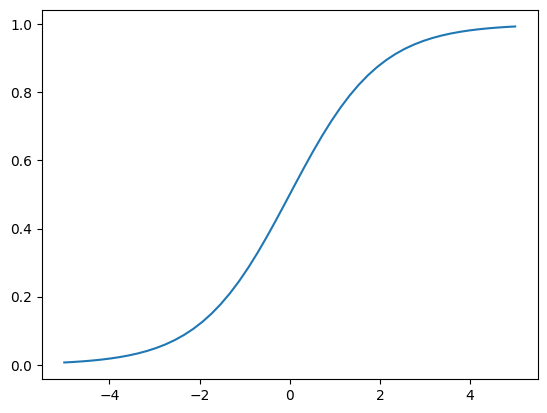

In [2]:
import torch
from torch import nn
import matplotlib.pylab as plt

m = nn.Sigmoid()  # 시그모이드 함수

x = torch.linspace(-5, 5, 50)
y = m(x)

plt.plot(x, y)
plt.show()

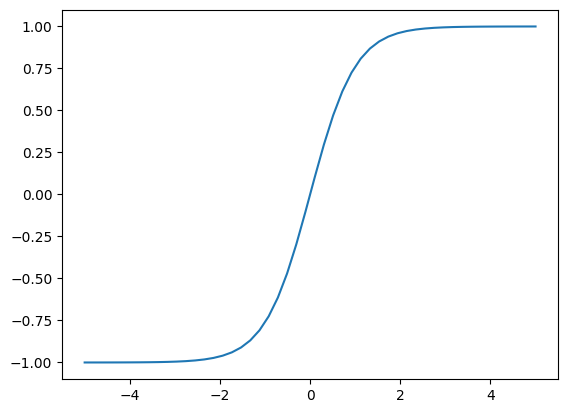

In [3]:
import torch
from torch import nn
import matplotlib.pylab as plt

m = nn.Tanh()  # tanh

x = torch.linspace(-5, 5, 50)
y = m(x)

plt.plot(x, y)
plt.show()

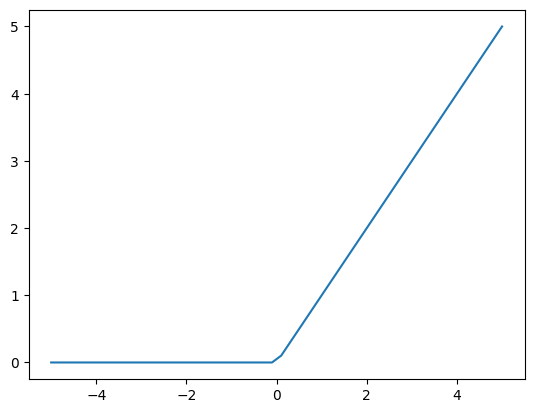

In [7]:
import torch
from torch import nn
import matplotlib.pylab as plt

m = nn.ReLU()  # ReLU

x = torch.linspace(-5, 5, 50)
y = m(x)

plt.plot(x, y)
plt.show()

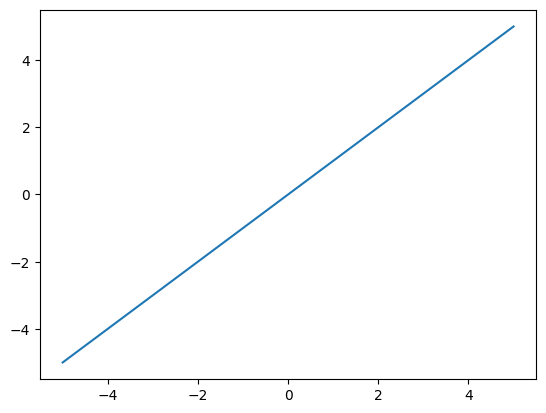

In [8]:
import torch
import matplotlib.pylab as plt

x = torch.linspace(-5, 5, 50)
y = x  # 항등 함수

plt.plot(x, y)
plt.show()

In [9]:
#%%
import torch
from torch import nn
import matplotlib.pylab as plt

m = nn.Softmax(dim=1)  # 각 행에서 소프트맥스 함수

x = torch.tensor([[1.0, 2.0, 3.0],
                  [3.0, 2.0, 1.0]])
y = m(x)

print(y)


tensor([[0.0900, 0.2447, 0.6652],
        [0.6652, 0.2447, 0.0900]])


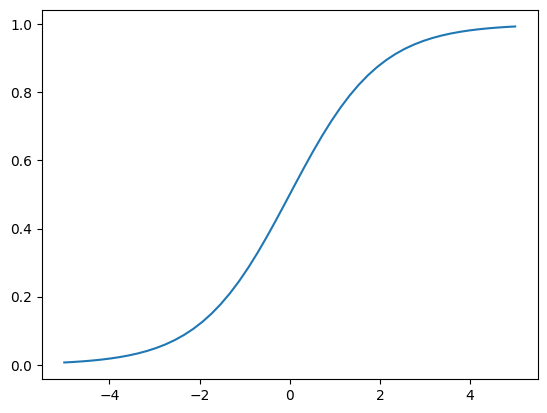

In [10]:
import torch
import matplotlib.pylab as plt

x = torch.linspace(-5, 5, 50)
y = torch.sigmoid(x)

plt.plot(x, y)
plt.show()

In [1]:
import torch
from torch import nn

y = torch.tensor([3.0, 3.0, 3.0, 3.0, 3.0])  # 출력
t = torch.tensor([2.0, 2.0, 2.0, 2.0, 2.0])  # 정답

loss_func = nn.MSELoss()  # 평균 제곱 오차
loss = loss_func(y, t)
print(loss.item())

1.0


In [2]:
import torch
from torch import nn

# 소프트맥스 함수로의 입력
x = torch.tensor([[1.0, 2.0, 3.0],  # 입력1
                  [3.0, 1.0, 2.0]])  # 입력2
# 정답(one-hot 표현에서 1의 위치)
t = torch.tensor([2,  # 입력1에 대응하는 정답
                  0])  # 입력2에 대응하는 정답

loss_func = nn.CrossEntropyLoss()  # 소프트맥스 함수 + 교차 엔드로피 오차
loss = loss_func(x, t)
print(loss.item())

0.40760600566864014


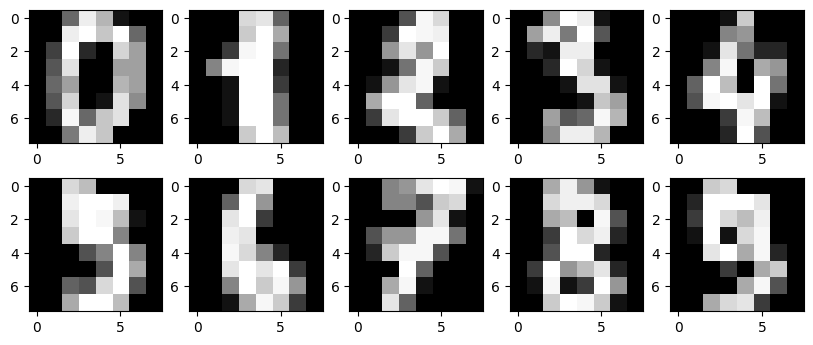

데이터의 형태:  (1797, 64)
라벨:  [0 1 2 3 4 5 6 7 8 9]


In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10  # 표시하는 이미지의 수
plt.figure(figsize=(10, 4))
for i in range(n_img):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
    ax.get_xaxis().set_visible(True)  # 축을 비표시로
    ax.get_yaxis().set_visible(True)
plt.show()

print("데이터의 형태: ", digits_data.data.shape)
print("라벨: ", digits_data.target[:n_img])

In [13]:
#%%
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)  # 25%가 테스트용

# Tensor로 변환
x_train = torch.tensor(x_train, dtype=torch.float32)  # 입력: 훈련용
t_train = torch.tensor(t_train, dtype=torch.int64)  # 정답: 훈련용
x_test = torch.tensor(x_test, dtype=torch.float32)  # 입력: 테스트용
t_test = torch.tensor(t_test, dtype=torch.int64)  # 정답: 테스트용

In [14]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),  # 전결합층
    nn.ReLU(),          # ReLU
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [15]:
from torch import optim

# 소프트맥스 함수 + 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# SGD 모델의 파라미터를 건넨다
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 학습률은 0.01

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 훈련 데이터를 1000회 사용한다
for i in range(1000):

    # 파라미터의 경사를 0으로
    optimizer.zero_grad()

    # 순전파
    y_train = net(x_train)
    y_test = net(x_test)

    # 오차를 구해서 기록한다
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 역전파(경사를 계산)
    loss_train.backward()

    # 파라미터 갱신
    optimizer.step()

    if i%100 == 0:  # 100회마다 경과를 표시
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 2.5546746253967285 Loss_Test: 2.548764944076538
Epoch: 100 Loss_Train: 0.8900886178016663 Loss_Test: 0.9226788282394409
Epoch: 200 Loss_Train: 0.3607722818851471 Loss_Test: 0.40462738275527954
Epoch: 300 Loss_Train: 0.22643029689788818 Loss_Test: 0.2745113670825958
Epoch: 400 Loss_Train: 0.16874106228351593 Loss_Test: 0.21699932217597961
Epoch: 500 Loss_Train: 0.13606193661689758 Loss_Test: 0.18421192467212677
Epoch: 600 Loss_Train: 0.11421360075473785 Loss_Test: 0.16332775354385376
Epoch: 700 Loss_Train: 0.09877317398786545 Loss_Test: 0.14875896275043488
Epoch: 800 Loss_Train: 0.08711639791727066 Loss_Test: 0.13809065520763397
Epoch: 900 Loss_Train: 0.07779374718666077 Loss_Test: 0.1303083896636963


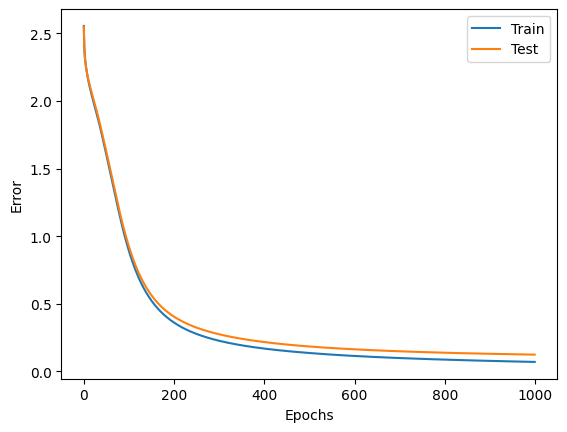

In [16]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [18]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("정답률:", str(count/len(y_test)*100) + "%")

정답률: 95.77777777777777%


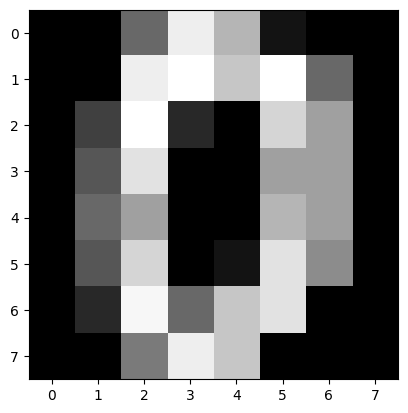

정답: 0 예측 결과: 0


In [19]:
# 입력 이미지
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("정답:", labels[img_id], "예측 결과:", y_pred.argmax().item())

In [20]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits_data = datasets.load_digits()

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)  # 25%가 테스트용

# Tensor로 변환
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

In [21]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 128),  # 전결합층
    nn.ReLU(),          # ReLU
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(net.parameters())   # ←여기에 코드를 기술

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 1000 에포크 학습
for i in range(1000):

    # 경사를 0으로
    optimizer.zero_grad()

    # 순전파
    y_train = net(x_train)
    y_test = net(x_test)

    # 오차를 구한다
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 역전파(경사를 구한다)
    loss_train.backward()

    # 파라미터 갱신
    optimizer.step()

    if i%100 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 0.04470234736800194 Loss_Test: 0.11515648663043976
Epoch: 100 Loss_Train: 0.0008423372637480497 Loss_Test: 0.09700564295053482
Epoch: 200 Loss_Train: 0.0001746267662383616 Loss_Test: 0.09705568850040436
Epoch: 300 Loss_Train: 5.3928542911307886e-05 Loss_Test: 0.09800813347101212
Epoch: 400 Loss_Train: 2.7648089599097148e-05 Loss_Test: 0.10116591304540634
Epoch: 500 Loss_Train: 1.729073301248718e-05 Loss_Test: 0.10217384248971939
Epoch: 600 Loss_Train: 1.1888211702171247e-05 Loss_Test: 0.10303417593240738
Epoch: 700 Loss_Train: 8.640399755677208e-06 Loss_Test: 0.10326085984706879
Epoch: 800 Loss_Train: 6.569339802808827e-06 Loss_Test: 0.10347134619951248
Epoch: 900 Loss_Train: 5.116365628055064e-06 Loss_Test: 0.10363950580358505


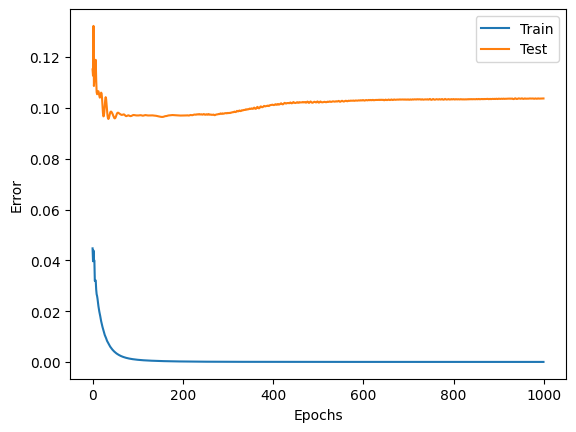

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [28]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("정답률:", str(count/len(y_test)*100) + "%")

정답률: 98.44444444444444%
